<a href="https://colab.research.google.com/github/Mkhan2317/Portfolio_Optimization/blob/main/Strategic_Asset_Allocation_and_Risk_Optimization_for_Multi_asset_Portfolio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MD AMIR KHAN, MS in Financial Engineering
**Date:** 08-09-2024


### Tools and Libraries for Portfolio Optimization and Analysis

- **Riskfolio-Lib**: A library designed for quantitative strategic asset allocation and portfolio optimization in Python. Built on top of `cvxpy`, it integrates seamlessly with pandas data structures.

- **SciPy `minimize` (method='SLSQP')**: This function minimizes a scalar function of several variables using Sequential Least Squares Programming (SLSQP). It is useful for optimizing portfolio weights to achieve desired financial metrics.

- **MPT PO (Monte Carlo Simulations for Optimization)**: A technique based on Monte Carlo simulations to search for the portfolio with the maximum Sharpe ratio, accounting for varying levels of market risk. It highlights the trade-off between risk and reward.

- **Portfolio Rebalancing**: This technique involves dynamically adjusting the asset allocation of a portfolio to align with evolving investment goals and market conditions.

- **pyfolio**: A Python library developed by Quantopian Inc. for performance and risk analysis of financial portfolios. It integrates well with the Zipline open-source backtesting library for evaluating trading strategies.




In [ ]:
!pip install quandl
!pip install Riskfolio-Lib


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

# Suppress warnings and format pandas display
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Tickers of assets
assets = ['DELL', 'ABNB', 'PANW', 'BKNG', 'UBER', 'IBM', 'SCCO', 'ADBE',
          'NFLX', 'SAP', 'TXN', 'ORCL', 'TTD', 'MU', 'PYPL', 'INTC',
          'GOOG', 'MSFT', 'NVDA', 'AMZN', 'META', 'TSLA', 'AAPL', 'AMD', 'CRM']
print(len(assets))  # Checking the number of assets (25)

# Date range
start = '2020-01-01'
end = '2024-07-26'

# Downloading data
data = yf.download(assets, start=start, end=end)

# Selecting Adjusted Close prices and renaming columns with asset tickers
data = data.loc[:, ('Adj Close', slice(None))]
data.columns = assets

# Calculating returns
Y = data[assets].pct_change().dropna()

# Display the first few rows of returns data
print(Y.head())



25


[*********************100%***********************]  25 of 25 completed


                              DELL     ABNB     PANW     BKNG     UBER  \
Date                                                                     
2020-12-11 00:00:00+00:00 -0.6735% -3.7731% -0.2013% -0.0109%  0.4814%   
2020-12-14 00:00:00+00:00 -0.5147% -6.6427%  2.2084%  3.4152%  1.3012%   
2020-12-15 00:00:00+00:00  5.0090% -4.0000% -0.7771%  2.4689%  0.2582%   
2020-12-16 00:00:00+00:00 -0.0547% 10.5689%  1.5042% -0.2780%  2.3961%   
2020-12-17 00:00:00+00:00  0.6964%  6.5657%  1.1145% -0.0103% -0.1506%   

                               IBM     SCCO     ADBE     NFLX      SAP  ...  \
Date                                                                    ...   
2020-12-11 00:00:00+00:00 -0.7440% -0.2243% -0.7206%  0.3627% -0.5522%  ...   
2020-12-14 00:00:00+00:00 -1.1105% -0.5170%  1.1027% -1.2185% -0.5955%  ...   
2020-12-15 00:00:00+00:00  1.5508% -0.5062%  1.8087%  0.4380%  1.9429%  ...   
2020-12-16 00:00:00+00:00  0.0314%  1.5762%  0.1763% -0.2698% -0.3018%  ...   
2020-12

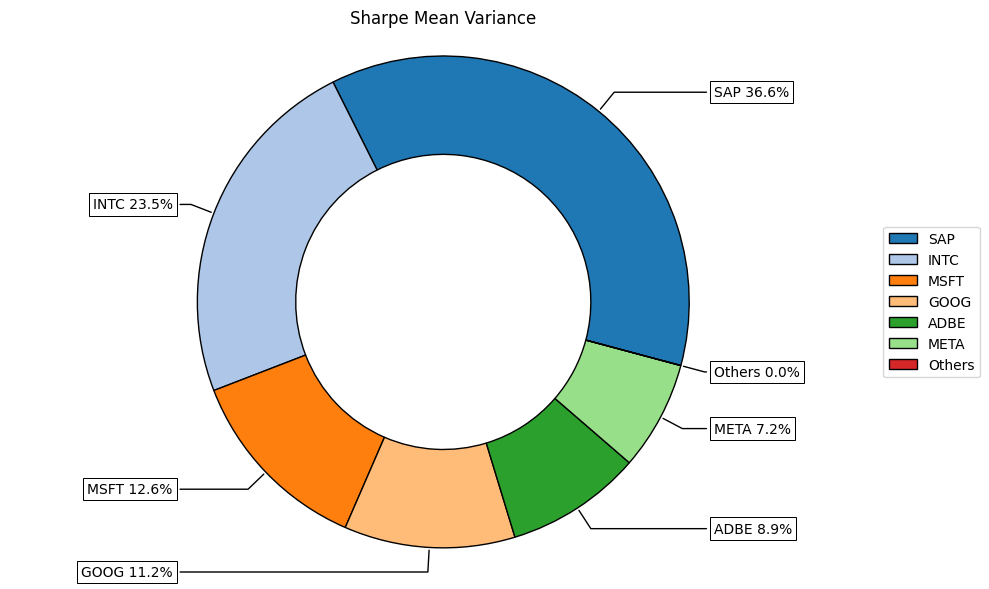

In [ ]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio
# Select method and estimate input parameters
method_mu = 'hist'  # Method to estimate expected returns based on historical data
method_cov = 'hist'  # Method to estimate covariance matrix based on historical data
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio
model = 'Classic'  # Can be Classic (historical), BL (Black-Litterman), or FM (Factor Model)
rm = 'MV'  # Risk measure, using variance (MV)
obj = 'Sharpe'  # Objective function, here it's to maximize Sharpe ratio
hist = True  # Use historical scenarios for risk measures that depend on scenarios
rf = 0  # Risk-free rate, here set to 0
l = 0  # Risk aversion factor, only used if obj is 'Utility'

# Optimizing portfolio
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# Plotting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap="tab20", height=6, width=10, ax=None)


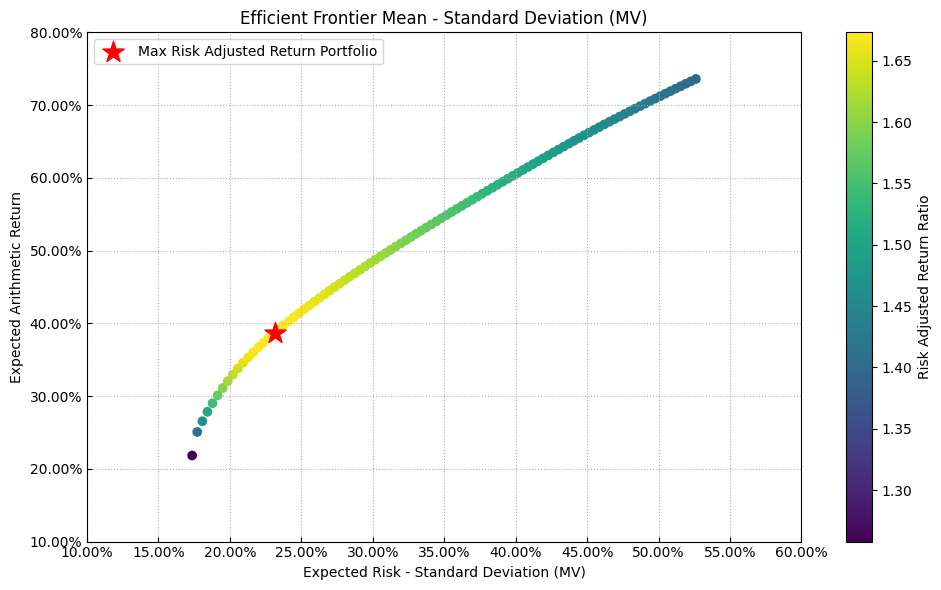

In [ ]:
# Calculating and plotting the MPT efficient frontier

# Calculate efficient frontier
points = 100  # Number of points on the efficient frontier
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

# Plotting the efficient frontier
label = 'Max Risk Adjusted Return Portfolio'  # Title for the optimized portfolio point
mu = port.mu  # Expected returns
cov = port.cov  # Covariance matrix
returns = port.returns  # Asset returns

# Plot the efficient frontier
ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


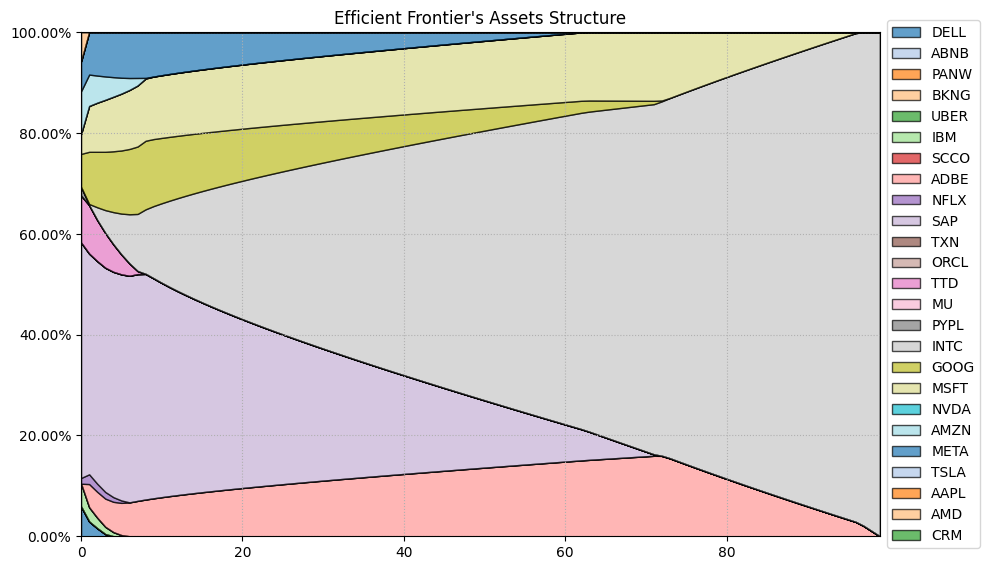

In [ ]:
# Plotting the efficient frontier composition
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)




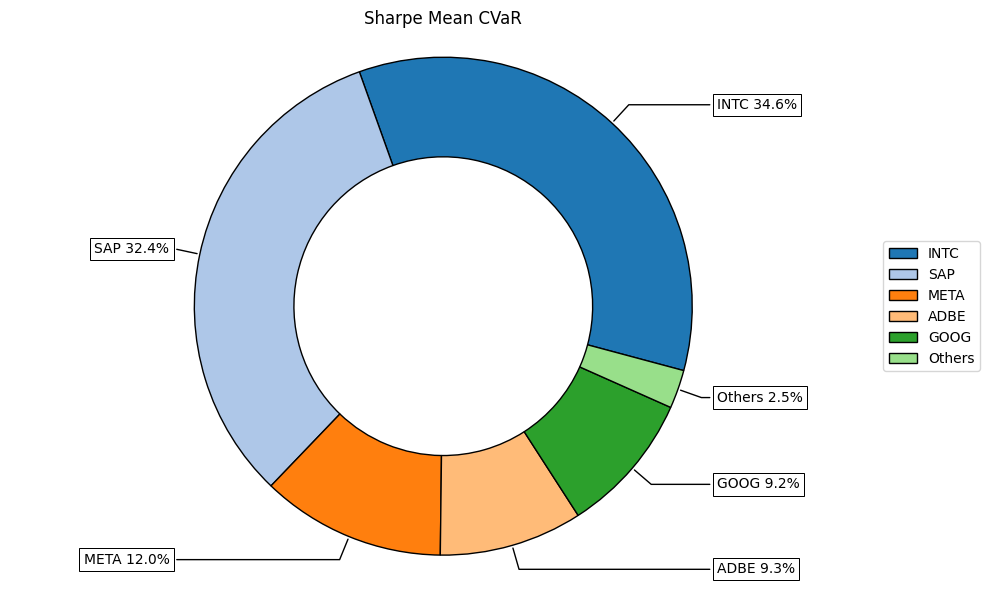

In [ ]:
# Calculating the portfolio that maximizes the Return/CVaR ratio
rm = 'CVaR'  # Using Conditional Value at Risk (CVaR) as the risk measure
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# Plotting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap="tab20",
                 height=6, width=10, ax=None)



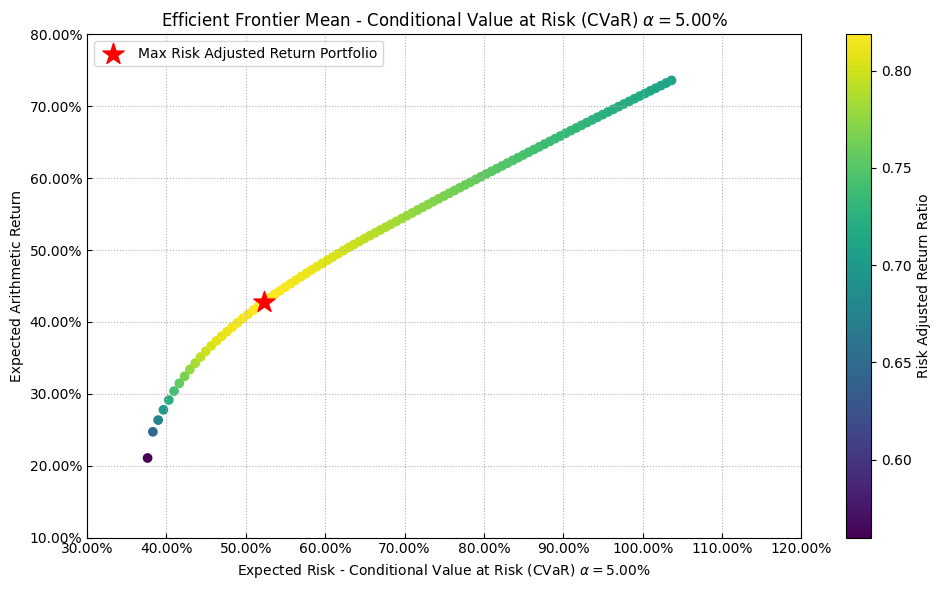

In [ ]:
# Plotting the Mean-CVaR efficient frontier

# Calculate the efficient frontier using Conditional Value at Risk (CVaR)
points = 100  # Number of points on the efficient frontier
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

# Plotting the efficient frontier
label = 'Max Risk Adjusted Return Portfolio'  # Title for the optimized portfolio point
ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


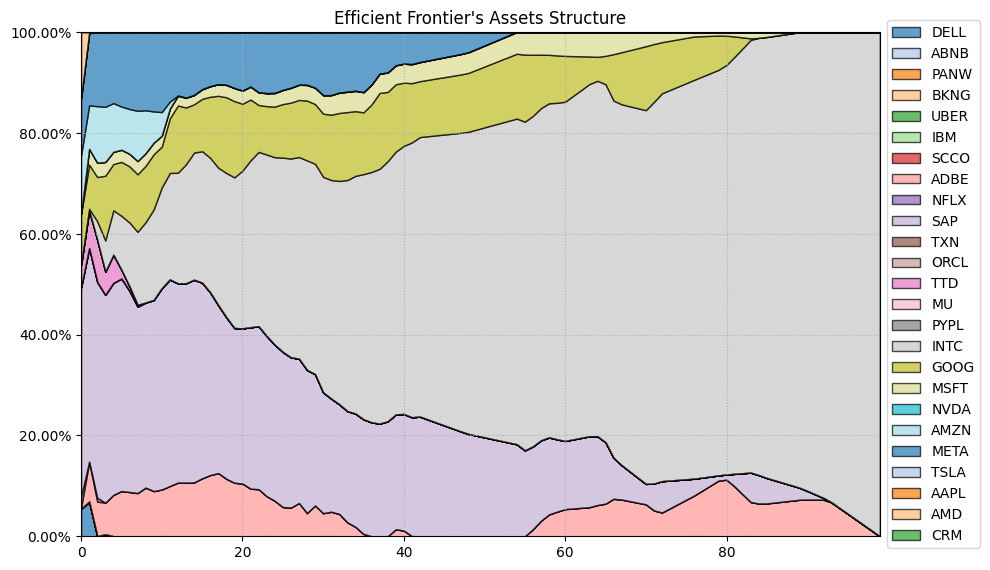

In [ ]:
# Plotting the efficient frontier composition based on CVaR
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


In [ ]:
# List of available risk measures
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

# DataFrame to store the weights for each risk measure
w_s = pd.DataFrame([])

# Loop through each risk measure and calculate the optimal portfolio
for rm in rms:
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)

# Set column names to the corresponding risk measures
w_s.columns = rms

# Display the portfolio weights with percentage formatting and a gradient for better visualization
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')


,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
DELL,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ABNB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
PANW,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BKNG,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
UBER,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
IBM,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
SCCO,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ADBE,8.95%,12.35%,9.34%,12.79%,9.01%,9.30%,2.95%,1.20%,0.00%,7.73%,5.45%,7.90%,1.46%
NFLX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
SAP,36.57%,37.70%,34.84%,38.70%,34.57%,32.36%,24.34%,20.46%,64.12%,54.58%,64.19%,58.53%,64.61%


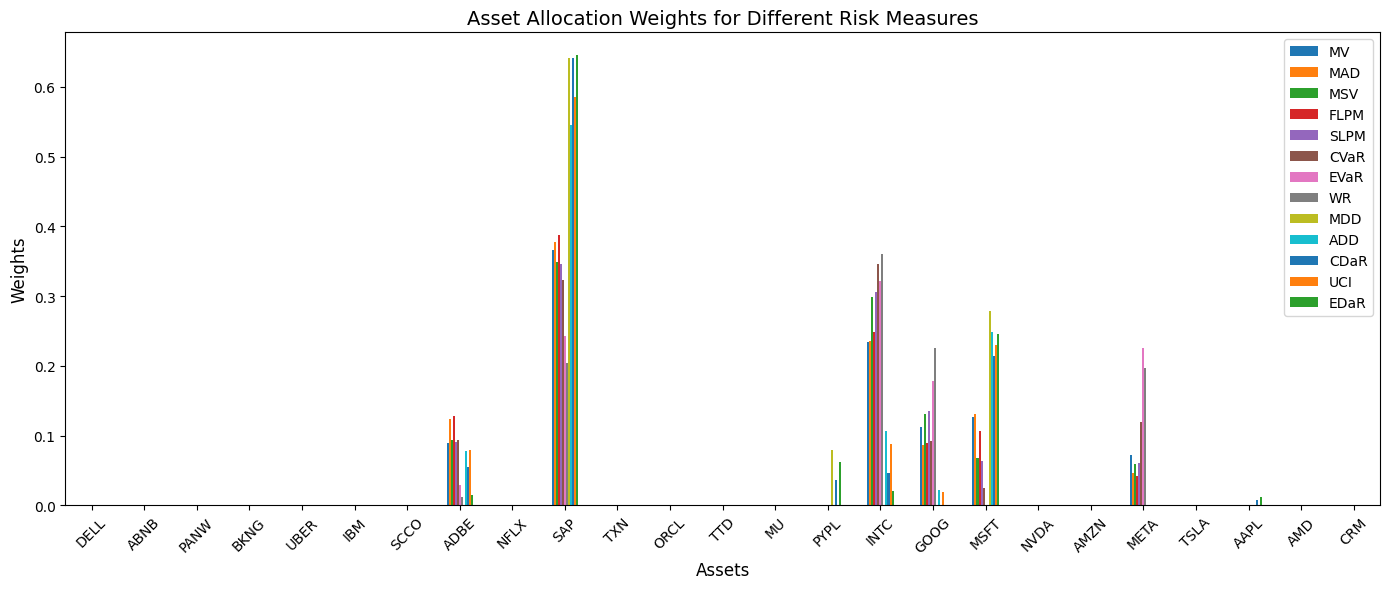

In [ ]:
import matplotlib.pyplot as plt

# Plotting a comparison of asset weights for each portfolio
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

# Plot a bar chart of asset weights across different risk measures
w_s.plot.bar(ax=ax)

# Setting the title and labels for better visualization
ax.set_title('Asset Allocation Weights for Different Risk Measures', fontsize=14)
ax.set_xlabel('Assets', fontsize=12)
ax.set_ylabel('Weights', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

# Ensure inline plotting in Jupyter Notebooks
%matplotlib inline

# Copying the data to work with
df = data.copy()

# Print the stocks (assets) in the DataFrame
print('The stocks are:', df.columns)

# Set a random seed for reproducibility
np.random.seed(200)

# Generate random portfolio weights
weights = np.random.random(len(assets))
weights = weights / np.sum(weights)  # Normalize weights to sum up to 1

# Print the generated random weights
print('Random weights:', weights)


The stocks are: Index(['DELL', 'ABNB', 'PANW', 'BKNG', 'UBER', 'IBM', 'SCCO', 'ADBE', 'NFLX',
       'SAP', 'TXN', 'ORCL', 'TTD', 'MU', 'PYPL', 'INTC', 'GOOG', 'MSFT',
       'NVDA', 'AMZN', 'META', 'TSLA', 'AAPL', 'AMD', 'CRM'],
      dtype='object')
Random weights: [0.06301366 0.01506448 0.03952651 0.02848077 0.05081223 0.00019022
 0.02376721 0.06049098 0.03032752 0.06528586 0.05767569 0.06556679
 0.06139346 0.02019436 0.05626242 0.00806076 0.05223761 0.01665756
 0.00638558 0.06273829 0.05492895 0.0344665  0.0580842  0.03845962
 0.02992878]


In [ ]:
# Calculating the asset log daily returns
log_returns = np.log(df / df.shift(1))

# Calculating the covariance matrix of the log returns
cov_matrix = log_returns.cov() * 252  # Annualize the covariance matrix

# Calculating the expected annual return
expected_return = np.sum(log_returns.mean() * weights) * 252  # Annualize the return

# Calculating the expected annual volatility
expected_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Calculating the Sharpe ratio
sharpe_r = expected_return / expected_vol

# Printing the results
print(f"Expected Annual Return: {expected_return:.2%}")
print(f"Expected Annual Volatility: {expected_vol:.2%}")
print(f"Sharpe Ratio: {sharpe_r:.2f}")


Expected Annual Return: 18.03%
Expected Annual Volatility: 28.41%
Sharpe Ratio: 0.63


In [ ]:
import numpy as np

np.random.seed(200)

# Initialization of variables
portfolio_number = 10000
weights_total = np.zeros((portfolio_number, len(df.columns)))
returns = np.zeros(portfolio_number)
volatility = np.zeros(portfolio_number)
sharpe = np.zeros(portfolio_number)

# Generate random portfolios and calculate metrics
for i in range(portfolio_number):
    # Random weights
    weights = np.random.random(len(assets))
    weights = weights / np.sum(weights)  # Normalize weights

    # Store weights
    weights_total[i, :] = weights

    # Expected return
    returns[i] = np.sum((log_returns.mean() * weights) * 252)

    # Expected volatility
    volatility[i] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    # Sharpe ratio
    sharpe[i] = returns[i] / volatility[i]

# Find the maximum Sharpe ratio
max_sharpe = sharpe.max()

# Print the maximum Sharpe ratio
print(f"Maximum Sharpe Ratio: {max_sharpe:.2f}")



Maximum Sharpe Ratio: 0.81


In [ ]:
# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_index = sharpe.argmax()


In [ ]:
# Retrieve the weights of the portfolio at index 6117
max_sharpe_weights = weights_total[6117, :]

# Display the weights of the portfolio at index 6117
max_sharpe_weights


array([0.03369816, 0.02384189, 0.03073916, 0.01557581, 0.02691991,
       0.01677664, 0.01131073, 0.07801402, 0.02552391, 0.08765475,
       0.00925351, 0.0668527 , 0.08848405, 0.02780067, 0.03185717,
       0.05520476, 0.08137229, 0.00877285, 0.0032981 , 0.01804487,
       0.05128246, 0.08892774, 0.02873561, 0.07454356, 0.01551469])

In [ ]:
# Retrieve the expected return of the portfolio with the maximum Sharpe ratio
max_sharpe_return = returns[max_sharpe_index]

# Display the expected return of the portfolio with the maximum Sharpe ratio
max_sharpe_return


0.23180408494414045

In [ ]:
# Retrieve the expected volatility of the portfolio with the maximum Sharpe ratio
max_sharpe_vol = volatility[max_sharpe_index]

# Display the expected volatility of the portfolio with the maximum Sharpe ratio
max_sharpe_vol


0.2868945431212272

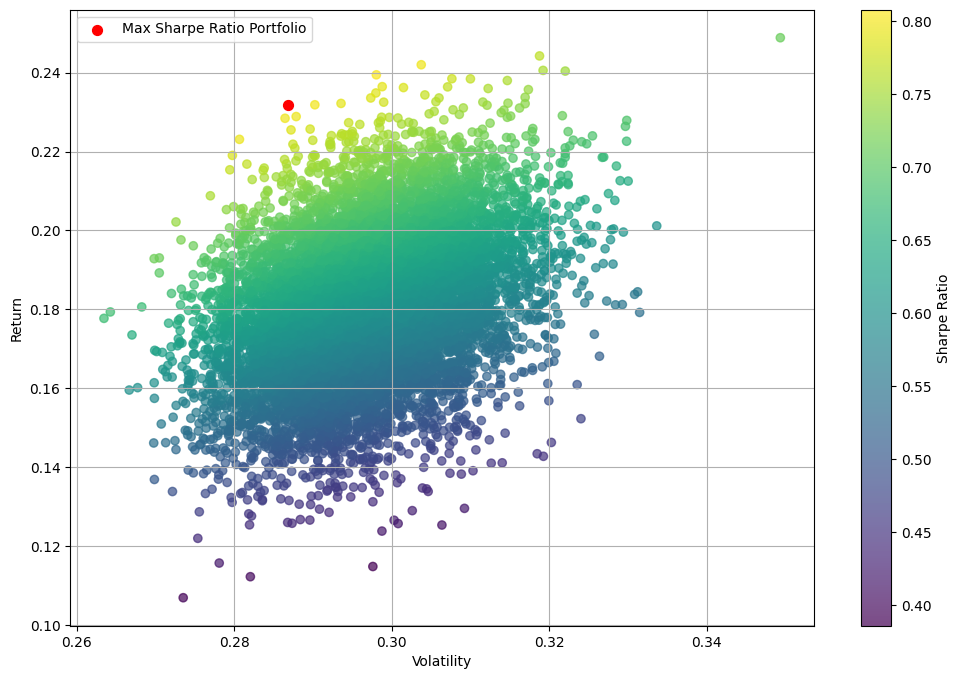

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of volatility vs. return
plt.figure(figsize=(12, 8))
plt.scatter(volatility, returns, c=sharpe, cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')

# Highlight the portfolio with the maximum Sharpe ratio
plt.scatter(max_sharpe_vol, max_sharpe_return, c='red', s=50, label='Max Sharpe Ratio Portfolio')

# Add labels and grid
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [ ]:
from scipy.optimize import minimize
import numpy as np

# Define function to calculate portfolio statistics
def stats(weights):
    weights = np.array(weights)
    expected_return = np.sum((log_returns.mean() * weights) * 252)
    expected_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_r = expected_return / expected_vol
    return np.array([expected_return, expected_vol, sharpe_r])

# Define function to negate the Sharpe ratio for minimization
def sr_negate(weights):
    return -stats(weights)[2]  # Minimize the negative Sharpe ratio

# Define constraint function (weights sum to 1)
def weight_check(weights):
    return np.sum(weights) - 1

# Define the bounds for each weight
bounds = [(0, 1)] * len(assets)

# Define the initial guess for the weights
initial_guess = np.array([0.06301366, 0.01506448, 0.03952651, 0.02848077, 0.05081223, 0.00019022,
                          0.02376721, 0.06049098, 0.03032752, 0.06528586, 0.05767569, 0.06556679,
                          0.06139346, 0.02019436, 0.05626242, 0.00806076, 0.05223761, 0.01665756,
                          0.00638558, 0.06273829, 0.05492895, 0.0344665, 0.0580842, 0.03845962,
                          0.02992878])

# Define the constraints
constraints = {'type': 'eq', 'fun': weight_check}

# Call the minimize function with SLSQP method
results = minimize(sr_negate, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Print the results
print(results)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.2355833731567467
       x: [ 3.598e-16  4.591e-16 ...  3.527e-17  0.000e+00]
     nit: 10
     jac: [ 9.174e-02  7.627e-01 ...  3.945e-01  4.567e-01]
    nfev: 261
    njev: 10


In [ ]:
# Extract the optimized portfolio weights from the results
wt = results.x

# Display the optimized weights
wt


array([3.59766917e-16, 4.59136515e-16, 0.00000000e+00, 7.25853215e-16,
       0.00000000e+00, 1.63559898e-16, 0.00000000e+00, 1.22592216e-01,
       1.15657625e-16, 2.76095911e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.91111770e-16, 5.61151628e-01,
       8.63142050e-02, 9.11148159e-02, 4.91664309e-16, 0.00000000e+00,
       8.80609560e-02, 2.31565878e-02, 0.00000000e+00, 3.52655421e-17,
       0.00000000e+00])

In [ ]:
# Calculate the portfolio statistics for the optimized weights
portfolio_stats = stats(wt)

# Display the statistics
portfolio_stats


array([0.48484946, 0.3924053 , 1.23558337])